In [1]:
from fastai.vision.all import *
import fastai
import timm
import cv2

In [2]:
learn = load_learner('resnet50d_citologia.pkl')

In [9]:
def predictImage(imagePath):
    im = cv2.imread(imagePath)
    
    (h,w,c) = im.shape
    # Image center
    cy = h // 2
    cx = w // 2
    
    imageCrop = im[int(cy - ((h // 512)*512/2)):int(cy + ((h // 512)*512/2)),
               int(cx - ((w // 512)*512/2)):int(cx + ((w // 512)*512/2))]
    
    #cv2.imwrite('tmp.jpg',imageCrop)
    
    newH = (h // 512)*512
    newW = (w // 512)*512
    
    predictionImage = np.zeros((newH,newW))
    
    prediction = 'benigno'
    for i in range(0,newH//512):
        for j in range(0,newW//512):
            imPatch = imageCrop[i*512:(i+1)*512,j*512:(j+1)*512]
            cv2.imwrite('tmp1.jpg',imPatch)
            clase,_,pred =learn.predict('tmp1.jpg')
            #print(pred)
            if clase == 'maligno':
                prediction = 'maligno'
            predictionImage[i*512:(i+1)*512,j*512:(j+1)*512] = int(pred[1]*255)
    
    im1 = imageCrop
    im2 = cv2.applyColorMap(np.array(predictionImage,dtype='uint8'), cv2.COLORMAP_OCEAN)
    
    fin = cv2.addWeighted(im1, 0.3, im2, 0.7, 0)
    
    cv2.imwrite('fin.jpg',fin)
    pilimage = PILImage.create('fin.jpg')
    return prediction,pilimage

In [19]:
prediction,pilimage = predictImage('dataset/benignos/42C.jpg')

In [20]:
print(prediction)

benigno


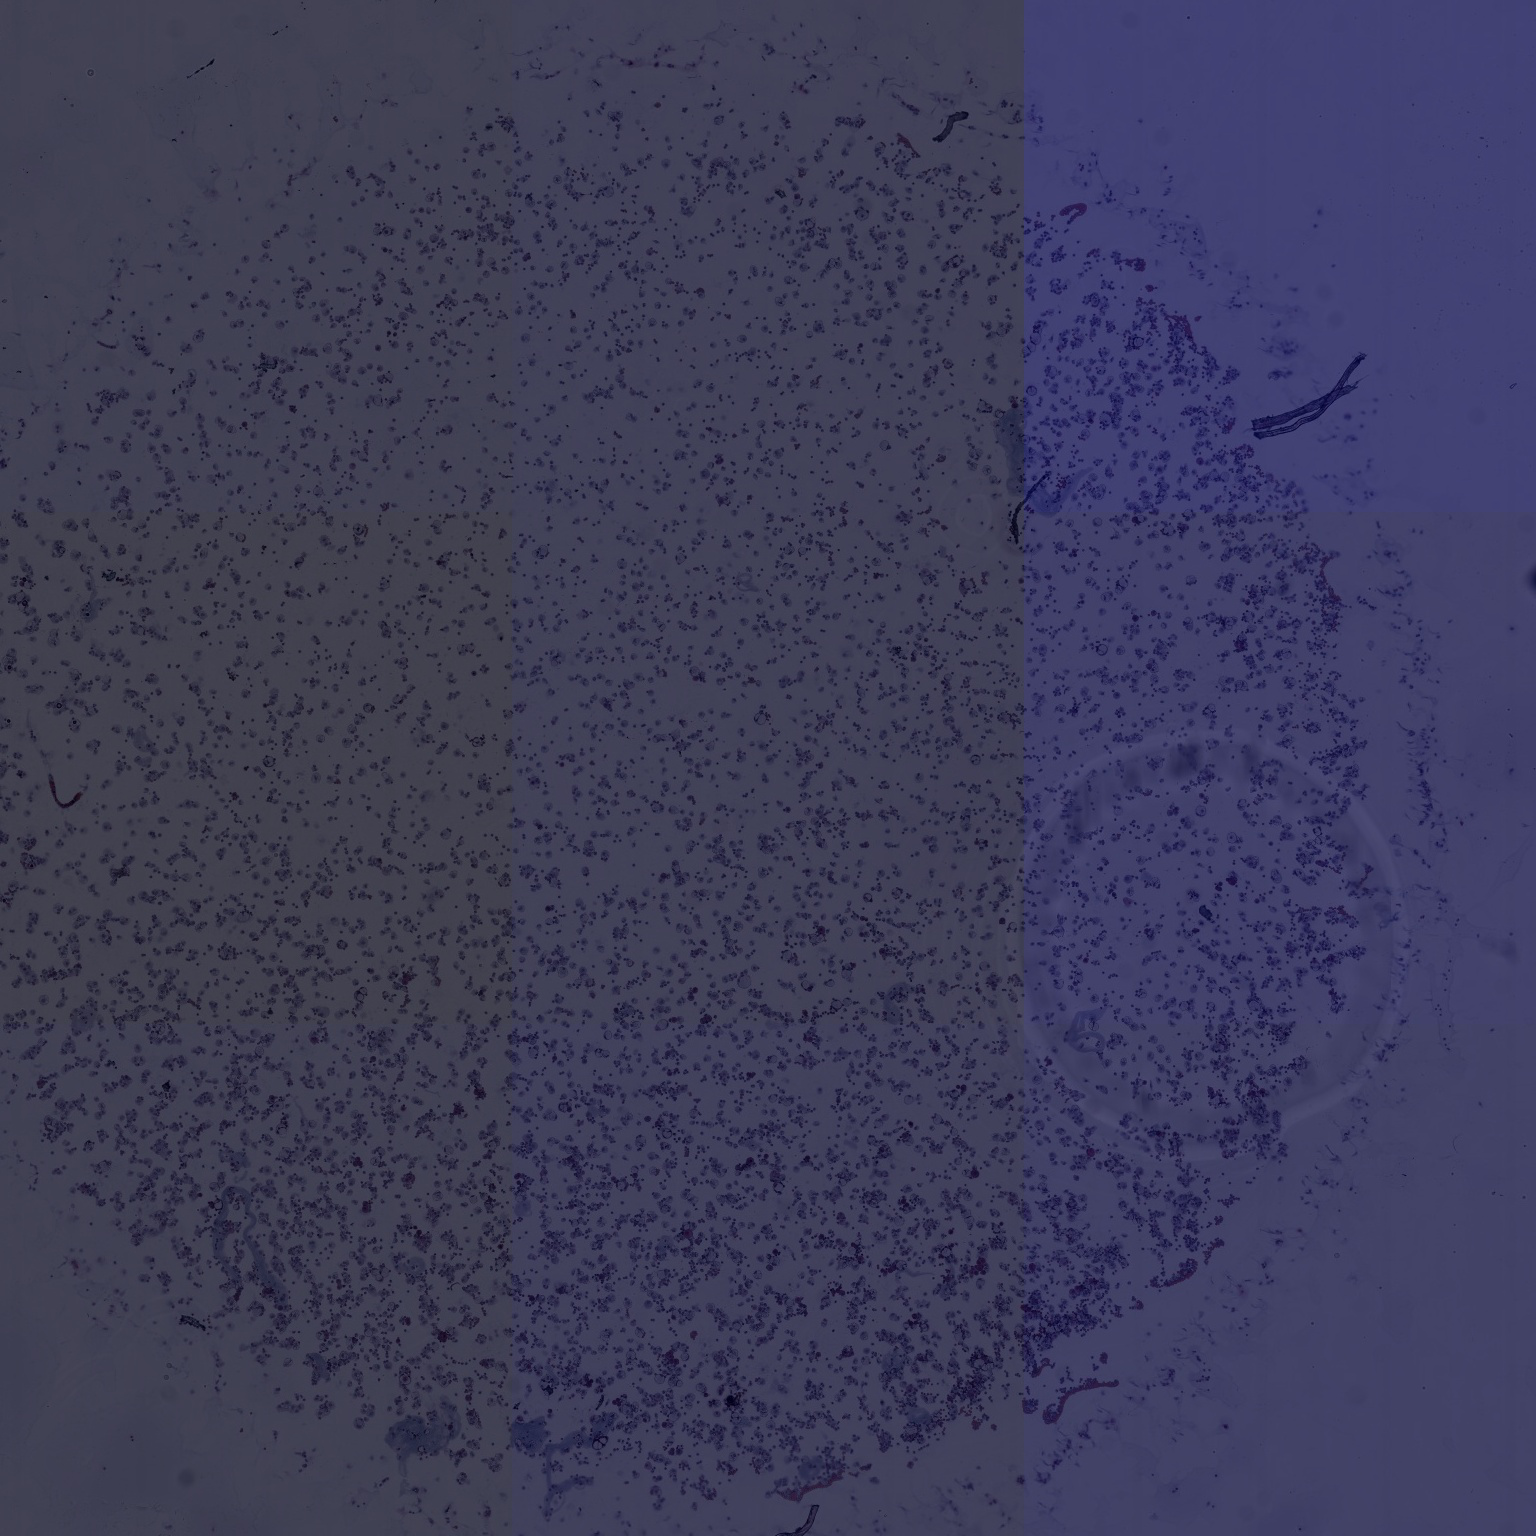

In [21]:
pilimage